In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
stop_common=set(stopwords.words('english'))
import matplotlib.pyplot as plt
import requests
import random 
from collections import OrderedDict
import bs4
from bs4 import BeautifulSoup
import re
from tqdm import tqdm
from tqdm import tqdm_notebook
import time
from time import sleep
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer

In [18]:
cities = ['Toronto%2C+ON', 'Waterloo%2C+ON', 'Montreal%2C+QC', 'Vancouver%2C+BC', 'Calgary%2C+AB', 'Ottawa%2C+ON', 'Québec+City%2C+QC', 'Brampton%2C+ON', 'Halifax%2C+NS', 'Hamilton%2C+ON', 'Surrey%2C+BC', 'Victoria%2C+BC', 'Kitchener%2C+ON', 'Winnipeg%2C+MB', 'Edmonton%2C+AB']
len(cities)

15

In [28]:
headers_list = [{'Connection': 'keep-alive', 'Upgrade-Insecure-Requests': '1', 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36', 'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Sec-Fetch-Site': 'same-origin', 'Sec-Fetch-Mode': 'navigate', 'Sec-Fetch-User': '?1', 'Sec-Fetch-Dest': 'document', 'Referer': 'https://www.google.com/', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'en-US,en;q=0.9'}
#IGNORE THIS BS
    #        {
    #     "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:77.0) Gecko/20100101 Firefox/77.0",
    #     "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
    #     "Accept-Language": "en-US,en;q=0.5",
    #     "Referer": "https://www.google.com/",
    #     "DNT": "1",
    #     "Connection": "keep-alive",
    #     "Upgrade-Insecure-Requests": "1"
    #       },
    # # Firefox 77 Windows
    # {
    #     "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:77.0) Gecko/20100101 Firefox/77.0",
    #     "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
    #     "Accept-Language": "en-US,en;q=0.5",
    #     "Accept-Encoding": "gzip, deflate, br",
    #     "Referer": "https://www.google.com/",
    #     "DNT": "1",
    #     "Connection": "keep-alive",
    #     "Upgrade-Insecure-Requests": "1"
    # },
    # # Chrome 83 Mac
    # {
    #     "Connection": "keep-alive",
    #     "DNT": "1",
    #     "Upgrade-Insecure-Requests": "1",
    #     "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36",
    #     "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
    #     "Sec-Fetch-Site": "none",
    #     "Sec-Fetch-Mode": "navigate",
    #     "Sec-Fetch-Dest": "document",
    #     "Referer": "https://www.google.com/",
    #     "Accept-Encoding": "gzip, deflate, br",
    #     "Accept-Language": "en-GB,en-US;q=0.9,en;q=0.8"
    # },
    # # Chrome 83 Windows 
    # {
    #     "Connection": "keep-alive",
    #     "Upgrade-Insecure-Requests": "1",
    #     "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36",
    #     "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
    #     "Sec-Fetch-Site": "same-origin",
    #     "Sec-Fetch-Mode": "navigate",
    #     "Sec-Fetch-User": "?1",
    #     "Sec-Fetch-Dest": "document",
    #     "Referer": "https://www.google.com/",
    #     "Accept-Encoding": "gzip, deflate, br",
    #     "Accept-Language": "en-US,en;q=0.9"
    # }
]


In [29]:
ordered_headers_list = []
for headers in headers_list:
    h = OrderedDict()
    for header,value in headers.items():
        h[header]=value
    ordered_headers_list.append(h)

In [ ]:
max_results_per_city = 1000
# header = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.67 Safari/537.36 Edg/87.0.664.55" ,'referer':'https://www.google.com/'}
proxies = {"http": "http://10.10.1.10:3128",
           "https": "http://10.10.1.10:1080"}
results = []
for i in tqdm(range(len(cities))):
    header = random.choice(headers_list)
    r = requests.Session()
    r.headers = headers
    for start in range(0, max_results_per_city, 100):
        sleep(2)
        print(header)
        url = "https://ca.indeed.com/jobs?as_and=software+developer&as_phr=&as_any=&as_not=&as_ttl=&as_cmp=&jt=all&st=&salary=&radius=25&l="+cities[i]+"&fromage=any&limit=100&start="+str(start)+"&sort=&psf=advsrch"
        
        
        html = r.get(url, headers=header)
        soup = BeautifulSoup(html.content, 'html.parser')
        if(len(soup.find_all('script', {'src':'https://www.google.com/recaptcha/api.js'}))==1):
            print('Captcha error(', cities[i],'): Retry in some time or use proxy.')
            break
        for row in soup.find_all('div', {'class':'jobsearch-SerpJobCard unifiedRow row result'}):
            results.append(row)


In [34]:
results_backup = results

In [46]:
sde_jobs = pd.DataFrame(columns=['location', 'title', 'company', 'salary', 'summary'])

In [47]:
def get_loc(row):
    try:
        return row.find('span', {'class':'location'}).text
    except: return 'NA'


def get_comp(row):
    try:
        return row.find('span', {'class':'company'}).text.replace('\n','')
    except: return 'NA'
    
def get_job(row):
    try:
        return row.find('a', {'data-tn-element':'jobTitle'}).text.replace('\n','')
    except: return 'NA'
    
        
def get_sal(row):
    try:
        return row.find('span', {'class':'salaryText'}).text.replace('\n','')
    except: return 'NA'
    
    
def get_desc(row):
    try:
        return row.find('div', {'class':'summary'}).text.replace('\n','')
    except: return 'NA'


In [52]:
for result in results:
    location = get_loc(result)
    title = get_job(result)
    company = get_comp(result)
    salary = get_sal(result)
    desc = get_desc(result)
    sde_jobs.loc[len(sde_jobs)] = [location, title, company, salary, desc]

In [53]:
sde_jobs.head(5)

,location,title,company,salary,summary
3820,NA,Senior .Net Developer – Dynamics CRM 2016 - 29...,Procom,NA,NA
1,NA,"Full Stack Java, C#, Objective-C/Swift Softwar...",YuJa - Powering Enterprise Video Everywhere,"$65,000 - $125,000 a year",You can recognize software problems and develo...
2,NA,Software Developer full stack,RIFO Realty Group Inc,"$65,000 - $85,000 a year",5+ years software development (Web) experience...
3,NA,"Software Developer, Java (Platform/Banking Teams)",GeeksForLess Canada Inc.,"$130,000 - $140,000 a year",A decent understanding of modern cloud infra/d...
4,NA,Database Programmer,B3 Systems,"$50,000 - $80,000 a year",Appropriate experience in a software engineeri...


In [54]:
sde_jobs.shape

(3820, 5)

In [55]:
sde_jobs = sde_jobs.drop_duplicates()

In [56]:
sde_jobs.shape

(2553, 5)

In [57]:
sde_jobs.to_csv('sde_scraped_results.csv', index=False, encoding='utf-8')

In [58]:
sde_scrapped_data = pd.read_csv('sde_scraped_results.csv')

In [59]:
sde_salaries = sde_scrapped_data[sde_scrapped_data.salary.notnull()]

In [60]:
sde_salaries.shape

(378, 5)

In [61]:
sde_salaries

,location,title,company,salary,summary
1,NaN,"Full Stack Java, C#, Objective-C/Swift Softwar...",YuJa - Powering Enterprise Video Everywhere,"$65,000 - $125,000 a year",You can recognize software problems and develo...
2,NaN,Software Developer full stack,RIFO Realty Group Inc,"$65,000 - $85,000 a year",5+ years software development (Web) experience...
3,NaN,"Software Developer, Java (Platform/Banking Teams)",GeeksForLess Canada Inc.,"$130,000 - $140,000 a year",A decent understanding of modern cloud infra/d...
4,NaN,Database Programmer,B3 Systems,"$50,000 - $80,000 a year",Appropriate experience in a software engineeri...
5,NaN,Software Developer,Concentra Bank,"$57,756 - $136,321 a year",This position also ensures that appropriate do...
...,...,...,...,...,...
2453,"Mississauga Valley, ON",.NET developer and Azure cloud specialist,Hansamed Ltd.,"$70,000 - $85,000 a year","Develop, modify and integrate software using ...."
2457,"Brampton, ON",computer programmer,Technocrat Consultants Inc.,$38.20 - $40.20 an hour,Research and evaluate a variety of software pr...
2470,"Mississauga, ON",PC (personal computer) application developer,Sialka Cloud Solutions,$38.50 an hour,Bachelor's degree 7 months to less than 1 year...
2496,"Mississauga, ON",cloud architect — information technology (IT),Saibber Canada Inc.,$55 - $60 an hour,"College, CEGEP or other non-university certifi..."


In [62]:
sde_salaries = sde_salaries[sde_salaries.location != 'Münchberg']

In [67]:
def clean_salary(df):
    preprocess_salary = []

    for i in df.salary:        
        if 'an hour' in i:
            i = i.replace('an hour', '').replace('$', '').replace('from', '').replace('From','')
            a = i.split('-')
            if(len(a) == 2):
                a = [float(x.strip().replace(',','')) for x in a]
                preprocess_salary.append(np.mean([float(b) for b in a])*8*300)
            else:
                a[0] = a[0].strip().replace(',','')
                preprocess_salary.append(float(a[0])*8*300)
                
        elif 'a week' in i:
            i = i.replace('a week', '').replace('$', '').replace('from', '').replace('From','')
            a = i.split('-')
            if(len(a) == 2):
                a = [float(x.strip().replace(',','')) for x in a]
                preprocess_salary.append(np.mean([float(b) for b in a])*52)
            else:
                a[0] = a[0].strip().replace(',','')
                preprocess_salary.append(float(a[0])*52)
        
        elif 'a month' in i:
            i = i.replace('a month', '').replace('$', '').replace('from', '').replace('From','')
            a = i.split('-')
            if(len(a) == 2):
                a = [float(x.strip().replace(',','')) for x in a]
                preprocess_salary.append(np.mean([float(b) for b in a])*12)
            else:
                a = [float(x.strip().replace(',','')) for x in a]
                preprocess_salary.append(float(a[0])*12)
        elif 'a year' in i:
            i = i.replace('a year', '').replace('$', '').replace('from', '').replace('From','')
            a = i.split('-')
            if len(a) == 2:
                a = [float(x.strip().replace(',','')) for x in a]
                preprocess_salary.append(np.mean([float(b) for b in a]))
            else:
                a[0] = a[0].strip().replace(',','')
                preprocess_salary.append(float(a[0]))
    return preprocess_salary

In [68]:
sde_cleaned_salary = clean_salary(sde_salaries)

In [73]:
for i in sde_salaries.salary:
    if len(i.split('-')) != 1 and len(i.split('-')) != 2:
        print(i)

In [74]:
len(sde_cleaned_salary)

378

In [76]:
sde_salaries.salary = sde_cleaned_salary

In [77]:
sde_salaries.shape

(378, 5)

In [78]:
sde_salaries.duplicated().sum()

0

In [79]:
sde_preprocessed_data = sde_salaries[sde_salaries['location'].notna()]

In [80]:
sde_preprocessed_data.to_csv('sde_final_data.csv', index=False, encoding='utf-8')

In [81]:
sde_salaries = pd.read_csv('sde_final_data.csv')

In [82]:
sde_salaries.head()

,location,title,company,salary,summary
0,"Toronto, ON",C# Developer,Brands.Buzz,65000.0,"As a C# Developer, you will have a strong unde..."
1,"Toronto, ON",Web Developer,Rose Rocket,80760.0,Develop Website architecture and determine har...
2,"North York, ON",software developer,Isheva inc,91680.0,Research and evaluate a variety of software pr...
3,"Toronto, ON",Web Designer/Developer,Ontario Learning Development Foundation,34200.0,The Web Developer will be responsible for the ...
4,"Toronto, ON","Programmer, Front End Full Stack Developer",Curamoir Inc,42000.0,Material UI as a basis to style responsive exi...


In [83]:
sde_median_salary = np.median(sde_salaries.salary)
sde_median_salary

84000.0

In [84]:
sde_salaries['high_salary'] = [1 if i > sde_median_salary else 0 for i in sde_salaries.salary]

In [85]:
sde_salaries.head()
print(len(sde_salaries))

def clean_data(data, stop_common):
    stop_common = set.union(stop_common, {'will', 'na', 'tools', 'software','full time',
                                          'skills','using', 'system', 'year', 'building', 'new',
                                         "build", "years", "scientist", "developer", "developers",
                                         "work", "knowledge", "full", "time", "provide", "looking",
                                         "role", "development", "engineer", "engineering", "including",
                                         "engineers", "working"})
    data = data.lower() #transfer to lower case
    data = data.replace("'s", "") #remove 's
    data = re.sub(r'[^\w]', ' ', data) #remove all symbol
    data = filter(lambda w: not w in stop_common,data.split(" "))#split the sentence and remove the stop words
    data = list(filter(("").__ne__, data)) #remove blank element
    
    return data

288


(-0.5, 399.5, 199.5, -0.5)

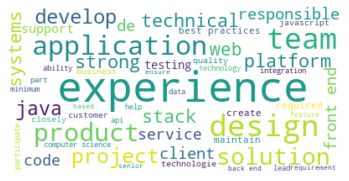

In [86]:
result = []
for i in range(sde_jobs.shape[0]):
    result+=clean_data(sde_jobs.iloc[i]["summary"], stop_common)
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(",".join(result))
wordcloud.to_file("./Software_Developer.png")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#### Only Location

In [87]:
sde_salaries.location.value_counts()

Toronto, ON                 92
Vancouver, BC               41
Montréal, QC                25
Calgary, AB                 23
Mississauga, ON             18
Ottawa, ON                  16
Burnaby, BC                  7
North York, ON               7
Markham, ON                  6
Brampton, ON                 5
Surrey, BC                   4
Waterloo, ON                 4
Greater Toronto Area, ON     4
Gatineau, QC                 3
Scarborough, ON              3
Quebec City, QC              3
Kitchener-Waterloo, ON       2
Richmond Hill, ON            2
Guelph, ON                   2
Kitchener, ON                2
Woodbridge, ON               2
Montréal-Est, QC             2
Saint-Hubert, QC             2
Delta, BC                    2
Saint-Laurent, QC            1
Etobicoke, ON                1
Richmond, BC                 1
Vaughan, ON                  1
Concord, ON                  1
North Vancouver, BC          1
West Vancouver, BC           1
Brossard, QC                 1
Caledon,

In [88]:
cities = []
states = []

for loc in sde_salaries.location:
    items = loc.split(',')
    cities.append(items[0])
    states.append(items[1])


In [89]:
only_states = []
for state in states:
    only_states.append(re.search(r'\w+', state).group(0))
print(len(only_states))

288


In [90]:
sde_salaries['city'] = cities
sde_salaries['state'] = only_states

In [91]:
sde_salaries.city = sde_salaries.city + ", " + sde_salaries.state

In [92]:
for i in sde_salaries.state:
    if len(i) > 2:
        print(i)

In [93]:
sde_salaries.head()

,location,title,company,salary,summary,high_salary,city,state
0,"Toronto, ON",C# Developer,Brands.Buzz,65000.0,"As a C# Developer, you will have a strong unde...",0,"Toronto, ON",ON
1,"Toronto, ON",Web Developer,Rose Rocket,80760.0,Develop Website architecture and determine har...,0,"Toronto, ON",ON
2,"North York, ON",software developer,Isheva inc,91680.0,Research and evaluate a variety of software pr...,1,"North York, ON",ON
3,"Toronto, ON",Web Designer/Developer,Ontario Learning Development Foundation,34200.0,The Web Developer will be responsible for the ...,0,"Toronto, ON",ON
4,"Toronto, ON","Programmer, Front End Full Stack Developer",Curamoir Inc,42000.0,Material UI as a basis to style responsive exi...,0,"Toronto, ON",ON


In [94]:
sde_salaries.city.nunique()

35

In [95]:
sde_salaries.city.value_counts()

Toronto, ON                 92
Vancouver, BC               41
Montréal, QC                25
Calgary, AB                 23
Mississauga, ON             18
Ottawa, ON                  16
Burnaby, BC                  7
North York, ON               7
Markham, ON                  6
Brampton, ON                 5
Surrey, BC                   4
Waterloo, ON                 4
Greater Toronto Area, ON     4
Gatineau, QC                 3
Scarborough, ON              3
Quebec City, QC              3
Kitchener-Waterloo, ON       2
Richmond Hill, ON            2
Guelph, ON                   2
Kitchener, ON                2
Woodbridge, ON               2
Montréal-Est, QC             2
Saint-Hubert, QC             2
Delta, BC                    2
Saint-Laurent, QC            1
Etobicoke, ON                1
Richmond, BC                 1
Vaughan, ON                  1
Concord, ON                  1
North Vancouver, BC          1
West Vancouver, BC           1
Brossard, QC                 1
Caledon,

In [96]:
city_dummies = pd.get_dummies(sde_salaries.city)

X_city = city_dummies
y_city = sde_salaries.high_salary

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_city, y_city, test_size=0.3, random_state=90)

In [98]:
rfc = RandomForestClassifier(n_estimators=300, random_state=90)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
acc = accuracy_score(y_test, rfc_pred)
print ("Accuracy Score:", acc.round(3))

s = cross_val_score(rfc, X_city, y_city, cv=10, n_jobs=-1)
print ("Cross Validation Score:\t{:0.3} ± {:0.3}".format(s.mean().round(3), s.std().round(3)))

Accuracy Score: 0.494
Cross Validation Score:	0.462 ± 0.109


In [100]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_city.columns).reset_index()
feature_importances.columns = ['feature', 'importance']

feature_medians = []
for i in X_city.columns:
    feature_medians.append(np.median(sde_salaries[sde_salaries.city == i].salary))

feature_importances['median_salary'] = feature_medians
feature_importances['over_or_under'] = [1 if i > sde_median_salary else 0 for i in feature_importances.median_salary]

feature_importances.sort_values('importance', ascending=False).head(15)

,feature,importance,median_salary,over_or_under
15,"Mississauga, ON",0.109890,94500.00,1
19,"North York, ON",0.088706,91680.00,1
20,"Ottawa, ON",0.061287,85763.00,1
26,"Scarborough, ON",0.045928,110400.00,1
13,"Markham, ON",0.042759,66528.75,0
32,"Waterloo, ON",0.038113,88889.25,1
4,"Calgary, AB",0.038100,78000.00,0
10,"Guelph, ON",0.034852,61500.00,0
6,"Delta, BC",0.033549,67200.00,0
16,"Montréal, QC",0.030607,75625.00,0


#### Only summary

In [102]:
sde_salaries_w_desc = sde_salaries[sde_salaries.summary.notnull()]

X_summ = sde_salaries_w_desc.summary
y_summ = sde_salaries_w_desc.high_salary

In [103]:
cv = CountVectorizer(stop_words="english")
cv.fit(X_summ)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [104]:
len(cv.get_feature_names())

1215

In [105]:
X_summ_trans = pd.DataFrame(cv.transform(X_summ).todense(), columns=cv.get_feature_names())

In [106]:
X_train, X_test, y_train, y_test = train_test_split(np.asmatrix(X_summ_trans), y_summ, test_size=0.3,
                                                    random_state=59, stratify=y_summ)

In [107]:
word_counts = X_summ_trans.sum(axis=0)
word_counts.sort_values(ascending = False).head(20)

software        250
development      92
experience       91
years            71
developer        53
design           44
applications     39
products         36
code             34
develop          31
web              31
variety          29
research         29
time             28
developers       27
work             27
test             27
computer         26
integrate        25
evaluate         25
dtype: int64

In [108]:
word_counts.to_csv('sde-indeed-words.csv', encoding='utf-8')

In [109]:
rfc = RandomForestClassifier(200, random_state=59)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
acc = accuracy_score(y_test, rfc_pred)
print("Accuracy Score:", acc.round(3))

s = cross_val_score(rfc, X_summ_trans.values, y_summ.values, cv=10, n_jobs=-1)
print("Cross Validation Score: {:0.3} ± {:0.3}".format(s.mean().round(3), s.std().round(3)))

Accuracy Score: 0.667
Cross Validation Score: 0.64 ± 0.116


In [113]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_summ_trans.columns).reset_index()
feature_importances.columns = ['feature', 'importance']

feature_medians = []
feature_means = []
for i in X_summ_trans.columns:
    feature_medians.append(np.median(sde_salaries_w_desc[sde_salaries_w_desc.summary.str.lower().str.contains(i)].salary))
    feature_means.append(np.mean(sde_salaries_w_desc[sde_salaries_w_desc.summary.str.lower().str.contains(i)].salary))


feature_importances['median_salary'] = feature_medians
feature_importances['mean_salary'] = feature_means
feature_importances['over_or_under'] = [1 if i > sde_median_salary else 0 for i in feature_importances.median_salary]

feature_importances.sort_values('importance', ascending=False).head(20)

,feature,importance,median_salary,mean_salary,over_or_under
314,development,0.020851,88750.00,101129.891892,1
1211,years,0.014197,91680.00,101470.101695,1
1017,software,0.013932,81600.00,89207.516129,0
995,services,0.011911,132000.00,123241.590909,1
62,applications,0.010473,89640.00,93071.802632,1
567,integration,0.010078,101000.00,103560.000000,1
135,business,0.009073,88750.00,90089.000000,1
586,java,0.009047,126000.00,109311.764706,1
205,computer,0.008538,85000.00,87505.909091,1
551,information,0.008410,110400.00,130982.727273,1


#### Only title

In [116]:
sde_salaries_w_desc = sde_salaries[sde_salaries.summary.notnull()]

X_title = sde_salaries_w_desc.title
y_title = sde_salaries_w_desc.high_salary

In [117]:
cv = CountVectorizer(stop_words="english")
cv.fit(X_title)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [118]:
X_title_trans = pd.DataFrame(cv.transform(X_title).todense(), columns=cv.get_feature_names())

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_title_trans, y_title, test_size=0.3, random_state=59)

In [120]:
rfc = RandomForestClassifier(200, random_state=59)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
acc = accuracy_score(y_test, rfc_pred)
print("Accuracy Score:", acc.round(3))

s = cross_val_score(rfc, X_title_trans.values, y_title.values, cv=10, n_jobs=-1)
print("Cross Validation Score: {:0.3} ± {:0.3}".format(s.mean().round(3), s.std().round(3)))

Accuracy Score: 0.678
Cross Validation Score: 0.67 ± 0.077


In [122]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_title_trans.columns).reset_index()
feature_importances.columns = ['feature', 'importance']

feature_medians = []
feature_means = []
for i in X_title_trans.columns:
    feature_medians.append(np.median(sde_salaries_w_desc[sde_salaries_w_desc.title.str.lower().str.contains(i)].salary))
    feature_means.append(np.mean(sde_salaries_w_desc[sde_salaries_w_desc.title.str.lower().str.contains(i)].salary))


feature_importances['median_salary'] = feature_medians
feature_importances['mean_salary'] = feature_means
feature_importances['over_or_under'] = [1 if i > sde_median_salary else 0 for i in feature_importances.median_salary]

feature_importances.sort_values('importance', ascending=False).head(20)

,feature,importance,median_salary,mean_salary,over_or_under
127,senior,0.073504,100000.0,106736.121212,1
154,web,0.061986,65000.0,64048.666667,0
131,software,0.046915,90414.5,95563.783333,1
74,java,0.046171,126000.0,121173.333333,1
134,stack,0.039290,75000.0,81929.693878,0
31,developer,0.035263,80760.0,86784.333333,0
44,end,0.032658,72500.0,78023.896552,0
110,programmer,0.032400,79000.0,75767.272727,0
80,lead,0.025602,87500.0,119211.600000,1
11,architect,0.021207,141500.0,168416.666667,1


#### Combining Title CV, Summary CV, and Location

In [124]:
sde_salaries_w_desc = sde_salaries_w_desc[sde_salaries_w_desc.summary.notnull()].reset_index()
city_dummies = pd.get_dummies(sde_salaries_w_desc.city)

X = pd.concat([city_dummies, X_title_trans, X_summ_trans], axis=1)
y = sde_salaries_w_desc.high_salary

In [125]:
print(X.shape)
print(y.shape)

(288, 1411)
(288,)


In [126]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.3, random_state=1234, stratify=y)

In [127]:
rfc = RandomForestClassifier(500, random_state=59)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
acc = accuracy_score(y_test, rfc_pred)
print("Accuracy Score:", acc.round(3))

s = cross_val_score(rfc, X.values, y.values, cv=10, n_jobs=-1)
print("Cross Validation Score: {:0.3} ± {:0.3}".format(s.mean().round(3), s.std().round(3)))

Accuracy Score: 0.736
Cross Validation Score: 0.67 ± 0.096


In [129]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X.columns).reset_index()
feature_importances.columns = ['feature', 'importance']

feature_medians = []
for i in city_dummies.columns:
    feature_medians.append(np.median(sde_salaries[sde_salaries.city == i].salary))
for i in X_title_trans.columns:
    feature_medians.append(np.median(sde_salaries_w_desc[sde_salaries_w_desc.title.str.lower().str.contains(i)].salary))
for i in X_summ_trans.columns:
    feature_medians.append(np.median(sde_salaries_w_desc[sde_salaries_w_desc.summary.str.lower().str.contains(i)].salary))

feature_importances['median_salary'] = feature_medians
feature_importances['over_or_under'] = [1 if i > sde_median_salary else 0 for i in feature_importances.median_salary]

feature_importances.sort_values('importance', ascending=False).head(20)

,feature,importance,median_salary,over_or_under
189,web,0.020668,65000.00,0
1407,years,0.016067,91680.00,1
162,senior,0.014975,100000.00,1
30,"Vancouver, BC",0.011304,82986.00,0
602,experience,0.010798,91389.25,1
464,data,0.010004,94800.00,1
510,development,0.009728,88750.00,1
1213,software,0.009326,81600.00,0
841,looking,0.008541,65576.50,0
169,stack,0.008508,75000.00,0
